# Zero-shot TS forecasting using DynaMix


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from dynamix.model.forecaster import DynaMixForecaster
from dynamix.utilities.plotting_eval import plot_TS_forecast
from dynamix.utilities.utilities import load_hf_model

## Load Model

In [2]:
# Load the pre-trained model
model = load_hf_model("dynamix-6d-alrnn-v1.0")

# Set model to evaluation mode
model.eval()

# Initialize the forecaster
forecaster = DynaMixForecaster(model)

## Time Series Forecasting

In [3]:
T = 200
CL = 200

# Load the time series data
ts_data = np.load("test_data/sine.npy")

# Make sure the data is properly shaped as 2D array (time, features)
if ts_data.ndim == 1:
    ts_data = ts_data.reshape(-1, 1)
    
context_ts = ts_data[:CL]
ground_truth_ts = ts_data[CL:CL+T]

print(f"Time series data shape: {ts_data.shape}")
print(f"Context shape: {context_ts.shape}")
print(f"Ground truth shape: {ground_truth_ts.shape}")

Time series data shape: (512, 1)
Context shape: (200, 1)
Ground truth shape: (200, 1)


Reconstruction shape:  (200, 1)


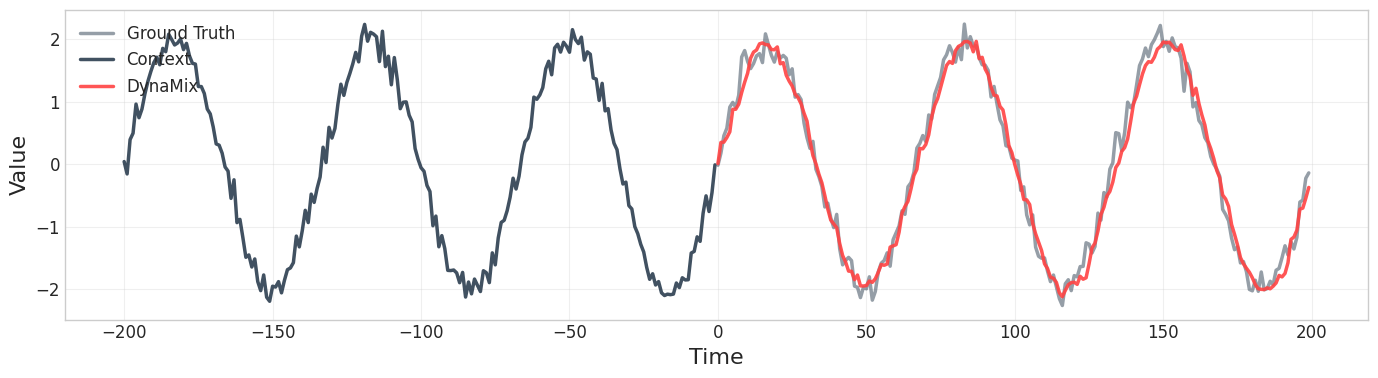

In [4]:
# Convert to PyTorch tensor
context_ts_tensor = torch.tensor(context_ts, dtype=torch.float32)

# Make prediction
with torch.no_grad():  # No gradient tracking needed for inference
    reconstruction_ts = forecaster.forecast(
        context=context_ts_tensor,
        horizon=T,
        preprocessing_method="pos_embedding",
        standardize=True,
        fit_nonstationary=False,
    )
    
# Convert to numpy for plotting
reconstruction_ts_np = reconstruction_ts.cpu().numpy()

print("Reconstruction shape: ", reconstruction_ts_np.shape)

# Visualize the time series forecast
fig = plot_TS_forecast(context_ts, reconstruction_ts_np, ground_truth=ground_truth_ts, lim=T)
plt.show()

In [5]:
T = 100
CL = 100

# Load the time series data
ts_data = np.load("test_data/ETTh1.npy")

# Make sure the data is properly shaped as 2D array (time, features)
if ts_data.ndim == 1:
    ts_data = ts_data.reshape(-1, 1)
    
context_ts = ts_data[:CL]
ground_truth_ts = ts_data[CL:CL+T]

print(f"Time series data shape: {ts_data.shape}")
print(f"Context shape: {context_ts.shape}")
print(f"Ground truth shape: {ground_truth_ts.shape}")

Time series data shape: (200, 1)
Context shape: (100, 1)
Ground truth shape: (100, 1)


Reconstruction shape:  (100, 1)


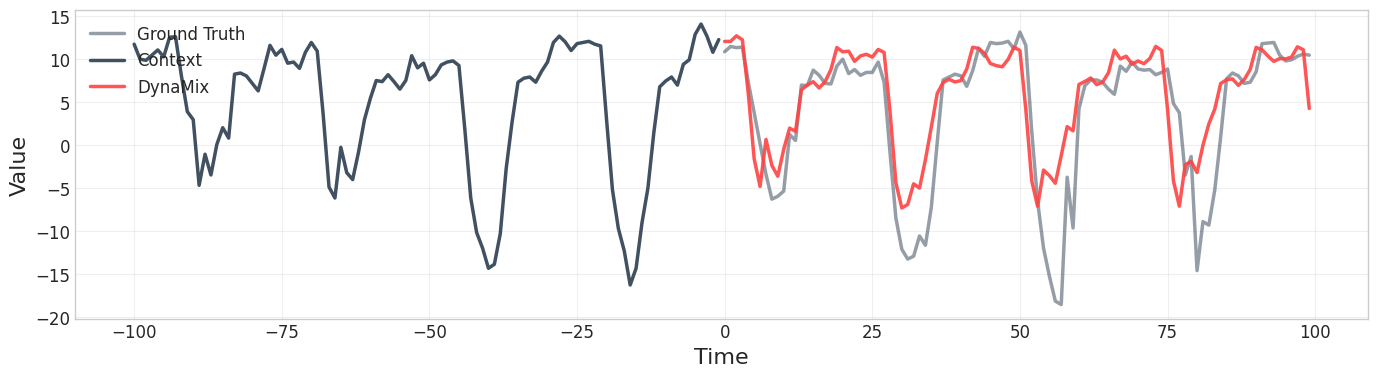

In [6]:
# Convert to PyTorch tensor
context_ts_tensor = torch.tensor(context_ts, dtype=torch.float32)

# Make prediction
with torch.no_grad():  # No gradient tracking needed for inference
    reconstruction_ts = forecaster.forecast(
        context=context_ts_tensor,
        horizon=T,
        preprocessing_method="pos_embedding",
        standardize=True,
        fit_nonstationary=False,
    )
    
# Convert to numpy for plotting
reconstruction_ts_np = reconstruction_ts.cpu().numpy()

print("Reconstruction shape: ", reconstruction_ts_np.shape)

# Visualize the time series forecast
fig = plot_TS_forecast(context_ts, reconstruction_ts_np, ground_truth=ground_truth_ts, lim=T)
plt.show()

In [7]:
T = 512
CL = 512

# Load the time series data
ts_data = np.load("test_data/cloud_requests.npy")

# Make sure the data is properly shaped as 2D array (time, features)
if ts_data.ndim == 1:
    ts_data = ts_data.reshape(-1, 1)
    
context_ts = ts_data[:CL]
ground_truth_ts = ts_data[CL:CL+T]

print(f"Time series data shape: {ts_data.shape}")
print(f"Context shape: {context_ts.shape}")
print(f"Ground truth shape: {ground_truth_ts.shape}")

Time series data shape: (1028, 1)
Context shape: (512, 1)
Ground truth shape: (512, 1)


Reconstruction shape:  (512, 1)


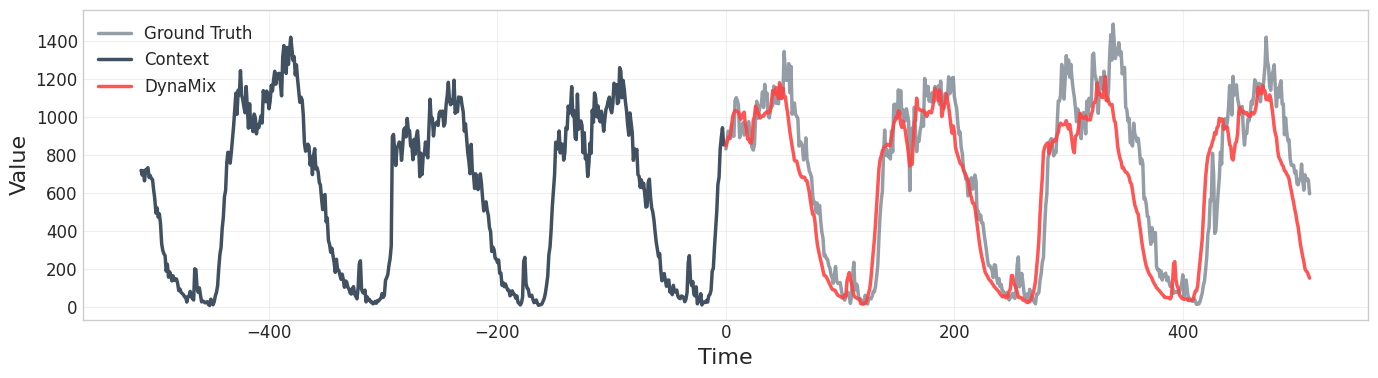

In [8]:
# Convert to PyTorch tensor
context_ts_tensor = torch.tensor(context_ts, dtype=torch.float32)

# Make prediction
with torch.no_grad():  # No gradient tracking needed for inference
    reconstruction_ts = forecaster.forecast(
        context=context_ts_tensor,
        horizon=T,
        preprocessing_method="pos_embedding",
        standardize=True,
        fit_nonstationary=False,
    )
    
# Convert to numpy for plotting
reconstruction_ts_np = reconstruction_ts.cpu().numpy()

print("Reconstruction shape: ", reconstruction_ts_np.shape)

# Visualize the time series forecast
fig = plot_TS_forecast(context_ts, reconstruction_ts_np, ground_truth=ground_truth_ts, lim=T)
plt.show()

In [9]:
T = 80
CL = 200

# Load the time series data
ts_data = np.load("test_data/AirPassengers.npy")

# Make sure the data is properly shaped as 2D array (time, features)
if ts_data.ndim == 1:
    ts_data = ts_data.reshape(-1, 1)
    
context_ts = ts_data[:CL]
ground_truth_ts = ts_data[CL:CL+T]

print(f"Time series data shape: {ts_data.shape}")
print(f"Context shape: {context_ts.shape}")
print(f"Ground truth shape: {ground_truth_ts.shape}")

Time series data shape: (287, 1)
Context shape: (200, 1)
Ground truth shape: (80, 1)


Reconstruction shape:  (80, 1)


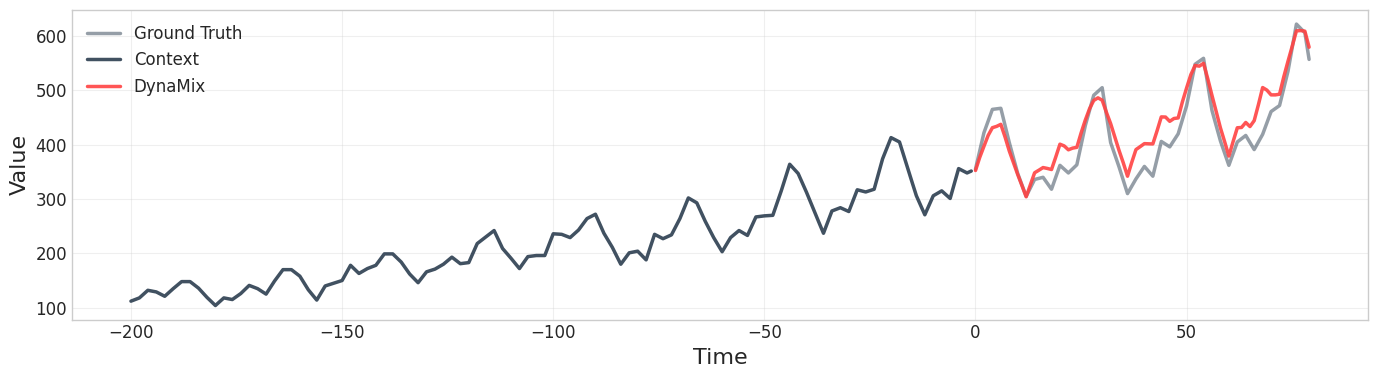

In [10]:
# Convert to PyTorch tensor
context_ts_tensor = torch.tensor(context_ts, dtype=torch.float32)

# Make prediction
with torch.no_grad():  # No gradient tracking needed for inference
    reconstruction_ts = forecaster.forecast(
        context=context_ts_tensor,
        horizon=T,
        preprocessing_method="pos_embedding",
        standardize=True,
        fit_nonstationary=True,
    )
    
# Convert to numpy for plotting
reconstruction_ts_np = reconstruction_ts.cpu().numpy()

print("Reconstruction shape: ", reconstruction_ts_np.shape)

# Visualize the time series forecast
fig = plot_TS_forecast(context_ts, reconstruction_ts_np, ground_truth=ground_truth_ts, lim=T)
plt.show()